In [372]:
import numpy as np
import scipy as sp
import scipy.sparse as sparse
import profile
#import timeit
import time
import matplotlib.pylab as plt
np.set_printoptions(linewidth=200)

In [196]:
def test_sparse(A):
    if sparse.isspmatrix(A):
        if sparse.isspmatrix_csc(A):
            return 'csc'
        elif sparse.isspmatrix_csr(A):
            return 'csr'
        elif sparse.isspmatrix_bsr(A):
            return 'bsr'
        elif sparse.isspmatrix_lil(A):
            return 'lil'
        elif sparse.isspmatrix_dok(A):
            return 'dok'
        elif sparse.isspmatrix_coo(A):
            return 'coo'
        elif sparse.isspmatrix_dia(A):
            return 'dia'
        else:
            return 'sparse'
    else:
        if isinstance(A, np.ndarray):
            return 'dense'
        elif isinstance(A, list):
            return 'list'
        else:
            return f'{type(A)}'

In [219]:
def make_sparse(A, mformat='csr'):
    if mformat=='csc':
        return sparse.csc_matrix(A)
    elif mformat=='csr':
        return sparse.csr_matrix(A)
    elif mformat=='bsr':
        return sparse.bsr_matrix(A)
    elif mformat=='lil':
        return sparse.lil_matrix(A)
    elif mformat=='dok':
        return sparse.dok_matrix(A)
    elif mformat=='coo':
        return sparse.coo_matrix(A)
    elif mformat=='dia':
        return sparse.dia_matrix(A)
    elif mformat=='dense':
        return A.todense()
    else:
        print("no known sparse-format")
        return A

In [220]:
def make_sparse_list(A, mformat):
    if isinstance(mformat, str):
        mformat = [mformat]
    sparse_list = []
    for form in mformat:
        sparse_list.append(make_sparse(A,form))
    return sparse_list

In [244]:
def matrix_vector_mult(A,b):
    return A.dot(b)

In [366]:
def test_dot_time(A,b,mformat,repeats=1,complex_test=False):
    sparse_list = make_sparse_list(A, mformat)
    time_list = []
    time_dic = {}
    for mat in sparse_list:
        # print(f'*****{test_sparse(mat):^5}*****')
        if complex_test:
            profile.runctx('print(mat.dot(b));print()',{'mat': mat, 'b': b}, {})
        else:
            # time.perf_counter() and time.process_time()
            # per_start = time.perf_counter()
            time_start = time.process_time()
            for i in range(repeats):
                mat.dot(b)
            # per_end = time.perf_counter()
            time_end = time.process_time()
            time_elapsed = (time_end - time_start)/repeats
            time_dic[test_sparse(mat)]=time_elapsed
            # print(f'performance counter: {per_end-per_start}')
            # print(f'process time: ', time_elapsed)
    return time_dic

In [351]:
def create_data(size_matrix = 5, density = 0.1):
    diagonals = [np.random.rand(size_matrix), np.random.rand(size_matrix-1), np.random.rand(size_matrix-1)]
    A_band = sparse.diags(diagonals, [0, -1, 1])
    A_sparse = sparse.rand(m=size_matrix, n=size_matrix, density=density)
    A = A_sparse + A_band
    b = np.random.rand(size_matrix)
    return (A,b)

In [421]:
def plot_time_dic(time_dic):
    plt.bar(range(len(time_dic)), time_dic.values(), align='center')
    plt.xticks(range(len(time_dic)), list(time_dic.keys()))
    plt.show()

In [422]:
def print_time_dic(time_dic):
    max_val = 0
    max_key = ''
    max_exp = 0
    # for key, val in time_dic.items():
    #     if val > max_val:
    #         max_val = val
    #         max_exp = np.floor(np.log10(np.abs(val)))
    #     # print('{:.3e} => {:0=8.3f}e9'.format(ix,ix/1e9))
    #     print(key, val, np.floor(np.log10(np.abs(val))))
    # print(max_val, max_exp)
    for key, val in time_dic.items():
        # print(f'{key:<5}: {val*10**(-1*max_exp):1.5f}E{int(max_exp):0=2}')
        print(f'{key:<5}: {val:1.3e}')

In [447]:
size_matrix = 1000
density = 0.1
# mformat = 'csc'
# mformat = 'csr'
# mformat = 'bsr'
# mformat = 'lil'
# mformat = 'dok'
# mformat = 'coo'
# mformat = 'dia'
mformat_list = ['csc', 'csr', 'bsr', 'lil', 'dok', 'coo', 'dia', 'dense']

In [448]:
A,b = create_data(size_matrix=size_matrix, density=density)
time_dic = test_dot_time(A,b,mformat_list,repeats=5)

csc  : 2.129e-04
csr  : 1.313e-04
bsr  : 1.160e-04
lil  : 1.644e-02
dok  : 8.876e-02
coo  : 2.976e-04
dia  : 2.084e-03
dense: 2.463e-03


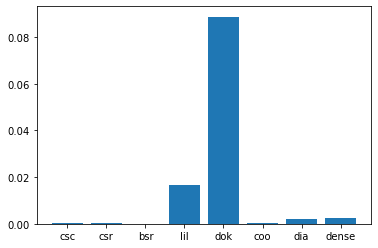

In [449]:
print_time_dic(time_dic)
plot_time_dic(time_dic)

In [450]:
print(A.todense())

[[0.31357529 0.99405883 0.         ... 0.         0.34457752 0.        ]
 [0.50321525 0.79189892 0.72486257 ... 0.         0.         0.        ]
 [0.32749134 0.98351813 0.78672345 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.45799344 ... 0.71668023 0.02196795 0.        ]
 [0.         0.         0.         ... 1.48919311 0.93535341 0.21437873]
 [0.         0.9470504  0.         ... 0.         0.34387206 0.64721629]]
